### Insights for Cleaning checklist
 - Entrepreneurs are irrelevant to analysis - good to ignore, will keep for database purposes.
 - Websites are irrelevant to analysis - good to ignore, will keep for database purposes.
 - Episode/season column imported as a date time, will use as a key in the database so need to transform column/mutate to non-date time

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from src.util import check_nulls


In [3]:
df1 = pd.read_excel('datasets/Shark Tank Companies.xlsx')

In [4]:
df1.sample(4)

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
442,True,"If you're like most people, you can hardly fun...",16,Storage and Cleaning Products,Dan Barnes and Wesley LaPorte,"Provo, UT",https://www.phonesoap.com,300000,8,4000000,6,Lori Greiner,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Mark Cuban,Phone Soap,2016-06-01,True
475,False,A technology platform allowing content creator...,25,Online Services,Alex Milewski and Sherisse Hawkins,"Boulder, CO",https://www.beneaththeink.com,350000,10,3500000,6,Lori Greiner,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Mark Cuban,Beneath the Ink,2025-06-01,True
457,True,LuminAID is a solar-powered inflatable light d...,20,Electronics,Andrea Sreshta and Anna Stork,"Oxford, MI",http://luminaid.com,200000,10,2000000,6,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,luminAID,2020-06-01,True
49,False,A portable golf ball cleaner.,11,Golf Products,"Alfonzo Dowe, Sr.","Lovejoy, GA",http://www.thetwistercleaner.com/,85000,40,212500,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Twister Cleaner,2023-11-01,False


In [5]:
summary_dict = check_nulls(df1)

for k, v in summary_dict.items():
    print(f'{k}: {v}')

deal: 0
description: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
episode: 0
category: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
entrepreneurs: {'standard_nulls': 72, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
location: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
website: {'standard_nulls': 38, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
askedFor: 0
exchangeForStake: 0
valuation: 0
season: 0
shark1: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
shark2: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
shark3: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
shark4: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
shark5: {'standard_nulls': 0, 'empty_strings': 0, 'specific_v

In [6]:
df1.isnull().sum()

deal                       0
description                0
episode                    0
category                   0
entrepreneurs             72
location                   0
website                   38
askedFor                   0
exchangeForStake           0
valuation                  0
season                     0
shark1                     0
shark2                     0
shark3                     0
shark4                     0
shark5                     0
title                      0
episode-season             0
Multiple Entreprenuers     0
dtype: int64

In [7]:
df1.loc[df1['website'].isna(), :].head(1)         

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,2023-01-01,False


In [8]:
df1.loc[df1['entrepreneurs'].isna(), :].head(10)   

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
185,True,Possibly the most successful product in Shark ...,7,Kitchen Tools,NaN,"Folcroft, PA",http://scrubdaddy.com,100000,10,1000000,4,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Scrub Daddy,2023-07-04,False
263,False,What is this? We're hearing about a tight-knit...,1,Specialty Food,NaN,"Tacoma, WA",http://lynnaesgourmetpickles.com,125000,20,625000,5,Lori Greiner,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Mark Cuban,Lynnae's Sweet Pickles,2023-01-05,False
265,True,Cake balls produced for the mass market and re...,1,Specialty Food,NaN,"Dallas, TX",http://www.sweetballz.com,250000,10,2500000,5,Lori Greiner,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Mark Cuban,Sweet Ballz,2023-01-05,False
266,True,An easy-to-use mobile app that allows you to t...,1,Online Services,NaN,"Los Angeles, CA",http://www.postcardontherun.com,300000,5,6000000,5,Lori Greiner,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Mark Cuban,Postcard on the Run,2023-01-05,False
273,True,Ramen noodles just got an upgrade. If you love...,3,Kitchen Tools,NaN,"Sacramento, CA",http://rapidramen.com,300000,10,3000000,5,Lori Greiner,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Mark Cuban,Rapid Ramen Cooker,2023-03-05,False
275,True,Surf-style comes to skateboards with Hamboards...,4,Outdoor Recreation,NaN,"Huntington Beach, CA",http://hamboards.com,100000,15,666667,5,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Hamboards,2023-04-05,False
277,True,ScreenMend is an easy and cost-effective way t...,4,Home Improvement,NaN,"Long Island, NY",http://www.screenmend.com,30000,25,120000,5,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Screen Mend,2023-04-05,False
278,False,Sunday Night Slow Jams is a radio show mixing ...,4,Entertainment,NaN,"San Diego, CA",http://www.slowjams.com,75000,10,750000,5,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Sunday Night Slow Jams,2023-04-05,False
283,True,Be a superhero around the house with FiberFix....,6,Home Improvement,NaN,"Pleasant Grove, UT",http://www.fiberfix.com,90000,10,900000,5,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,FiberFix,2023-06-05,False
285,True,Alternative financing solutions for small busi...,6,Professional Services,NaN,"Piscataway, NJ",http://www.totalmerchantresources.com,200000,20,1000000,5,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Total Merchant Resources,2023-06-05,False


In [9]:
df1.duplicated().value_counts()

False    495
Name: count, dtype: int64

In [10]:
df1.shape

(495, 19)

In [21]:
df1.columns

Index(['deal', 'description', 'episode', 'category', 'entrepreneurs',
       'location', 'website', 'askedFor', 'exchangeForStake', 'valuation',
       'season', 'shark1', 'shark2', 'shark3', 'shark4', 'shark5', 'title',
       'Multiple Entreprenuers', 'season_episode'],
      dtype='object')

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   deal                    495 non-null    bool          
 1   description             495 non-null    object        
 2   episode                 495 non-null    int64         
 3   category                495 non-null    object        
 4   entrepreneurs           423 non-null    object        
 5   location                495 non-null    object        
 6   website                 457 non-null    object        
 7   askedFor                495 non-null    int64         
 8   exchangeForStake        495 non-null    int64         
 9   valuation               495 non-null    int64         
 10  season                  495 non-null    int64         
 11  shark1                  495 non-null    object        
 12  shark2                  495 non-null    object    

In [12]:
df1[['episode', 'season', 'episode-season']]

,episode,season,episode-season
0,1,1,2023-01-01
1,1,1,2023-01-01
2,1,1,2023-01-01
3,1,1,2023-01-01
4,1,1,2023-01-01
...,...,...,...
490,28,6,2028-06-01
491,29,6,2029-06-01
492,29,6,2029-06-01
493,29,6,2029-06-01


In [13]:
df1['episode-season'].value_counts()

episode-season
2023-04-01    9
2023-05-01    9
2023-06-01    9
2023-01-01    5
2023-02-01    5
             ..
2023-01-04    4
2015-03-01    4
2014-03-01    4
2029-06-01    4
2023-08-04    3
Name: count, Length: 119, dtype: int64

In [14]:
df1.dtypes

deal                                bool
description                       object
episode                            int64
category                          object
entrepreneurs                     object
location                          object
website                           object
askedFor                           int64
exchangeForStake                   int64
valuation                          int64
season                             int64
shark1                            object
shark2                            object
shark3                            object
shark4                            object
shark5                            object
title                             object
episode-season            datetime64[ns]
Multiple Entreprenuers              bool
dtype: object

In [15]:
df1[['episode', 'season', 'episode-season']]

,episode,season,episode-season
0,1,1,2023-01-01
1,1,1,2023-01-01
2,1,1,2023-01-01
3,1,1,2023-01-01
4,1,1,2023-01-01
...,...,...,...
490,28,6,2028-06-01
491,29,6,2029-06-01
492,29,6,2029-06-01
493,29,6,2029-06-01


In [16]:
#  - Episode/season column imported as a date time, will use as a key in the database so need to transform column/mutate to non-date time
df1['season_episode'] = df1.apply(lambda x: f"{x['season']}-{x['episode']}", axis=1)
df1['season_episode'].value_counts()

season_episode
1-1     5
1-6     5
1-14    5
1-2     5
1-11    5
       ..
4-2     4
4-1     4
3-15    4
6-29    4
4-8     3
Name: count, Length: 122, dtype: int64

In [17]:
# Drop the column we dont need it as we made a transformed version under season_episode.
df1.drop(['episode-season'], axis=1, inplace=True)
df1.columns

Index(['deal', 'description', 'episode', 'category', 'entrepreneurs',
       'location', 'website', 'askedFor', 'exchangeForStake', 'valuation',
       'season', 'shark1', 'shark2', 'shark3', 'shark4', 'shark5', 'title',
       'Multiple Entreprenuers', 'season_episode'],
      dtype='object')

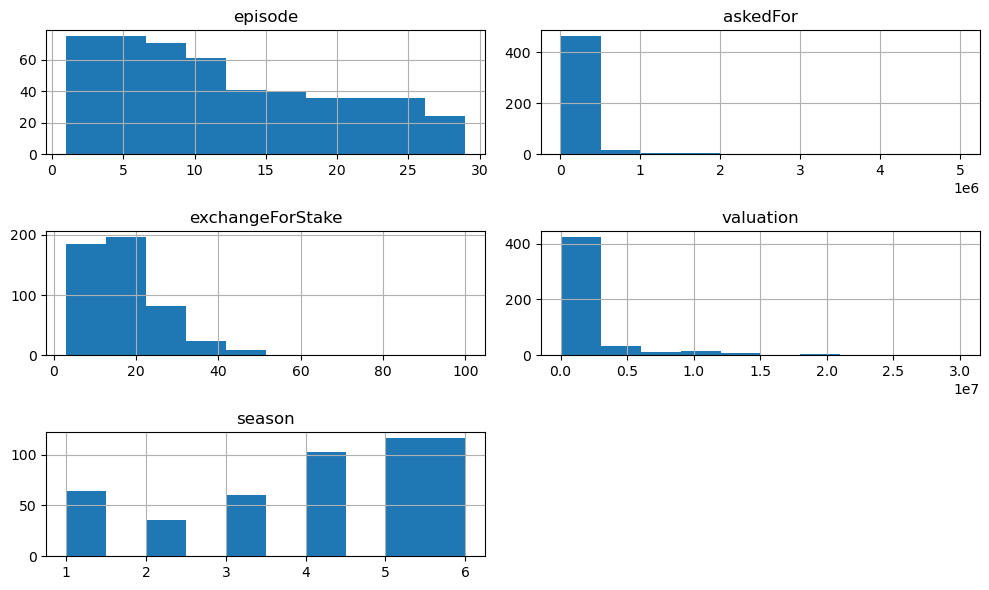

In [18]:
# Lets visualize our dataset - TRY THIS AGAIN AFTER CLEANING. 
df1.hist(bins=10, figsize=(10,6))
plt.tight_layout()
plt.show()

In [19]:
df1.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,Multiple Entreprenuers,season_episode
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,False,1-1
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,False,1-1
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,False,1-1
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,False,1-1
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,False,1-1


In [20]:
df1.to_excel('datasets/shark_tank_cleaned.xlsx', index=False)